In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings, os, re
import seaborn as sns
from xgboost import XGBClassifier, XGBRFClassifier
from catboost import CatBoostClassifier
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, precision_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
warnings.filterwarnings('ignore')
import dtale 
import datetime as dt

In [2]:
#importation des données
df = pd.read_csv('nearest.csv')
df.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [4]:
df.dtypes

neo_id                      int64
name                       object
absolute_magnitude        float64
estimated_diameter_min    float64
estimated_diameter_max    float64
orbiting_body              object
relative_velocity         float64
miss_distance             float64
is_hazardous                 bool
dtype: object

In [5]:
df.describe(include = 'all')

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
count,3.381990e+05,338199,338171.000000,338171.000000,338171.000000,338199,338199.000000,3.381990e+05,338199
unique,NaN,33514,NaN,NaN,NaN,1,NaN,NaN,2
top,NaN,277810 (2006 FV35),NaN,NaN,NaN,Earth,NaN,NaN,False
freq,NaN,211,NaN,NaN,NaN,338199,NaN,NaN,295037
mean,1.759939e+07,NaN,22.932525,0.157812,0.352878,NaN,51060.662908,4.153535e+07,NaN
std,2.287225e+07,NaN,2.911216,0.313885,0.701869,NaN,26399.238435,2.077399e+07,NaN
min,2.000433e+06,NaN,9.250000,0.000511,0.001143,NaN,203.346433,6.745533e+03,NaN
25%,3.373980e+06,NaN,20.740000,0.025384,0.056760,NaN,30712.031471,2.494540e+07,NaN
50%,3.742127e+06,NaN,22.800000,0.073207,0.163697,NaN,47560.465474,4.332674e+07,NaN
75%,5.405374e+07,NaN,25.100000,0.189041,0.422708,NaN,66673.820614,5.933961e+07,NaN


In [6]:
df = df.rename(columns = {'estimated_diameter_min': 'diametre_min'})

In [7]:
df = df.rename(columns = {'estimated_diameter_max': 'diametre_max'})

In [8]:
df.head(5)

,neo_id,name,absolute_magnitude,diametre_min,diametre_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [9]:
df = df.rename(columns = {'name': 'nom_nasa'})
df = df.rename(columns = {'absolute_magnitude': 'grandeur_absolue'})
df = df.rename(columns = {'orbiting_body': 'corps_orbite'})
df = df.rename(columns = {'relative_velocity': 'vitesse_relative'})
df = df.rename(columns = {'miss_distance': 'distance_manquée'})


In [10]:
df.head()

,neo_id,nom_nasa,grandeur_absolue,diametre_min,diametre_max,corps_orbite,vitesse_relative,distance_manquée,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


<AxesSubplot:ylabel='Frequency'>

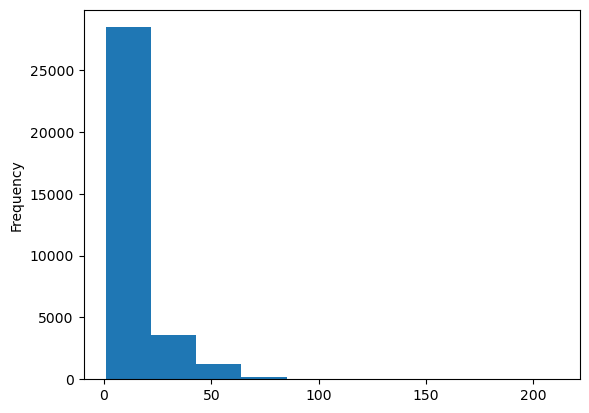

In [11]:
df['nom_nasa'].value_counts().plot(kind = 'hist')

<AxesSubplot:ylabel='count'>

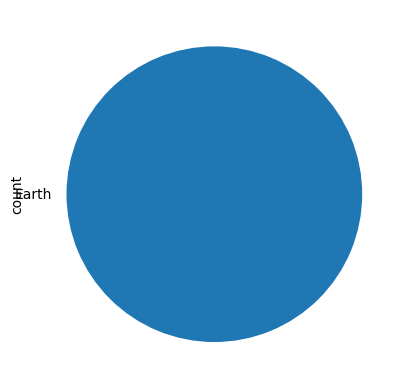

In [12]:
df['corps_orbite'].value_counts().plot(kind = 'pie')

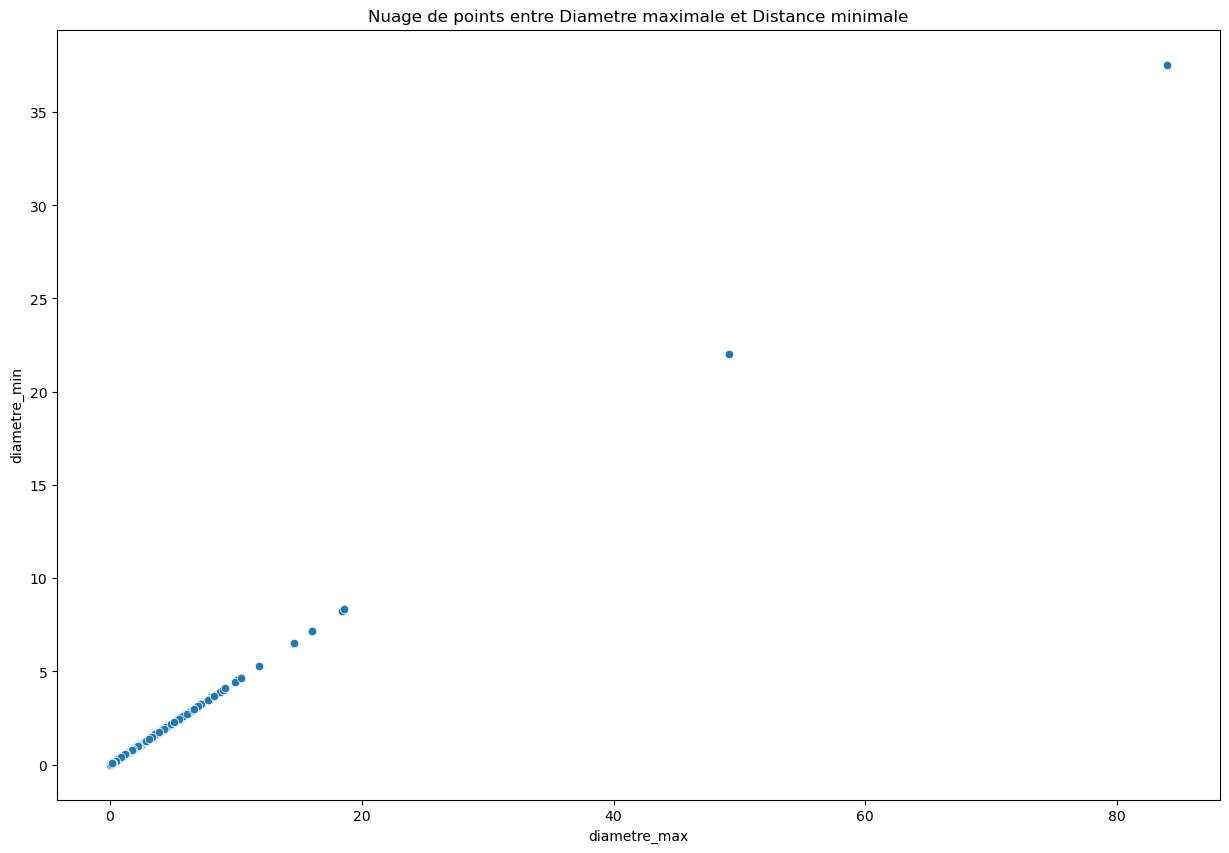

In [13]:
plt.figure(figsize = (15, 10))
sns.scatterplot(x = df['diametre_max'], y = df['diametre_min'])
plt.title('Nuage de points entre Diametre maximale et Distance minimale')
plt.show()

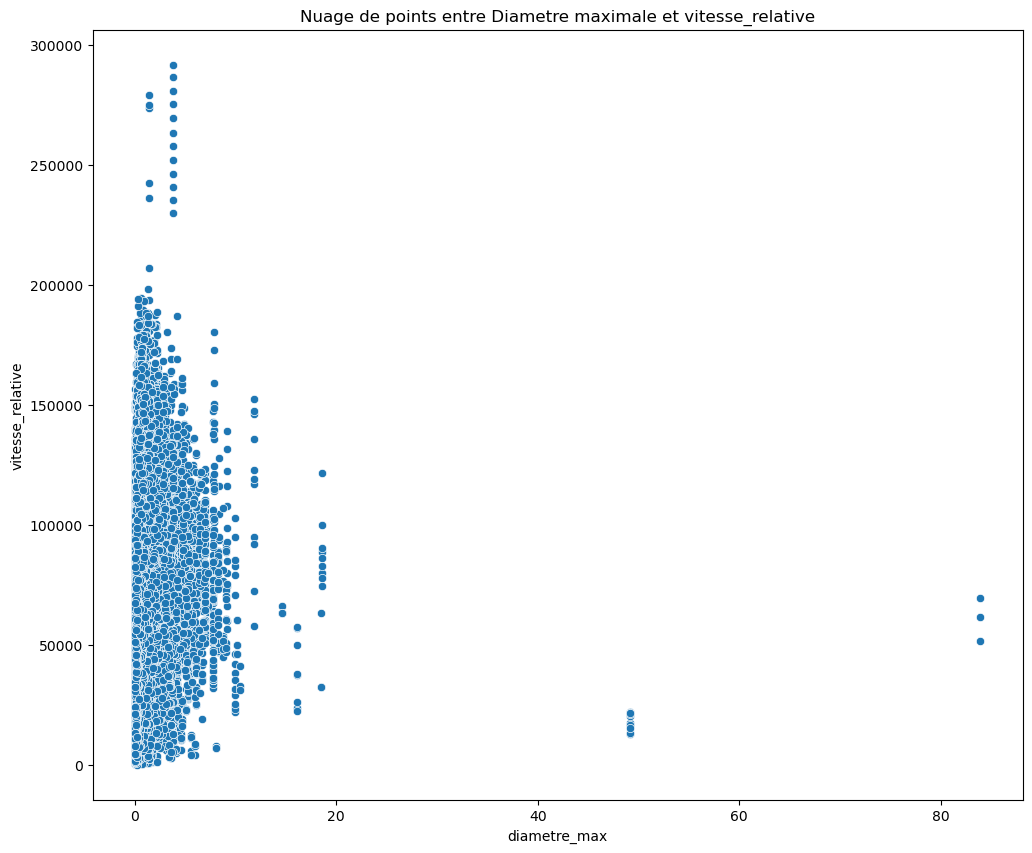

In [14]:
plt.figure(figsize = (12, 10))
sns.scatterplot(x = df['diametre_max'], y = df['vitesse_relative'])
plt.title('Nuage de points entre Diametre maximale et vitesse_relative')
plt.show()

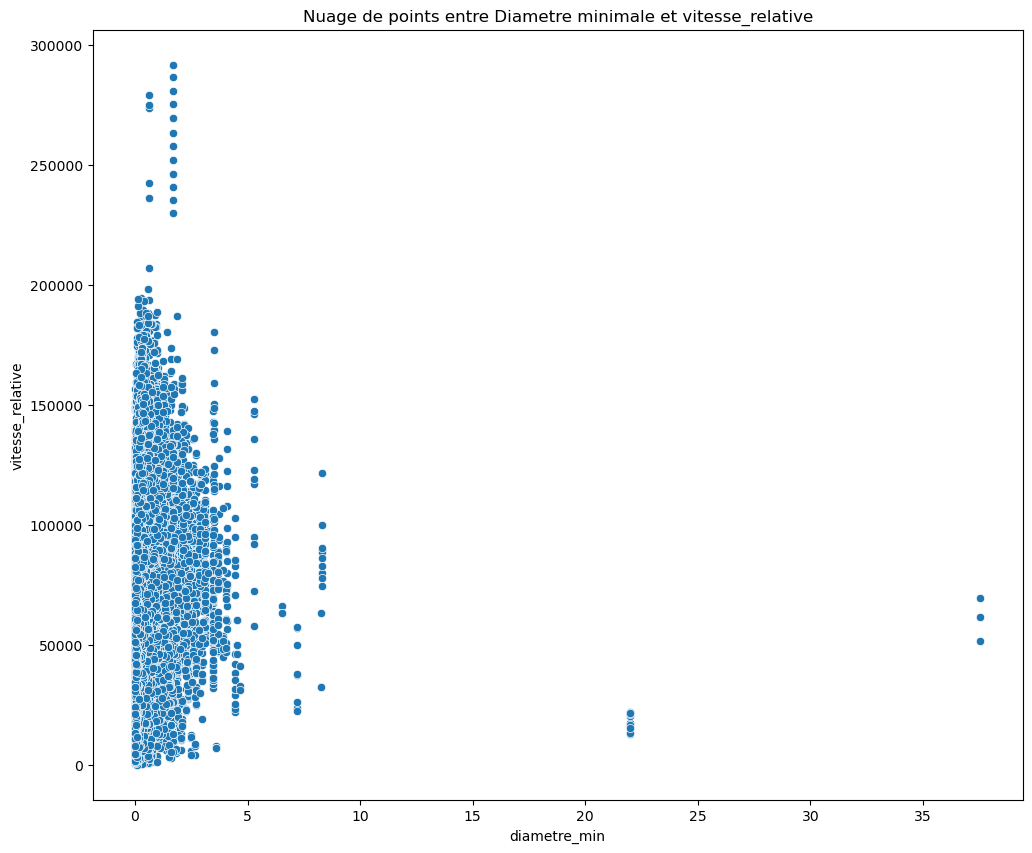

In [15]:
plt.figure(figsize = (12, 10))
sns.scatterplot(x = df['diametre_min'], y = df['vitesse_relative'])
plt.title('Nuage de points entre Diametre minimale et vitesse_relative')
plt.show()

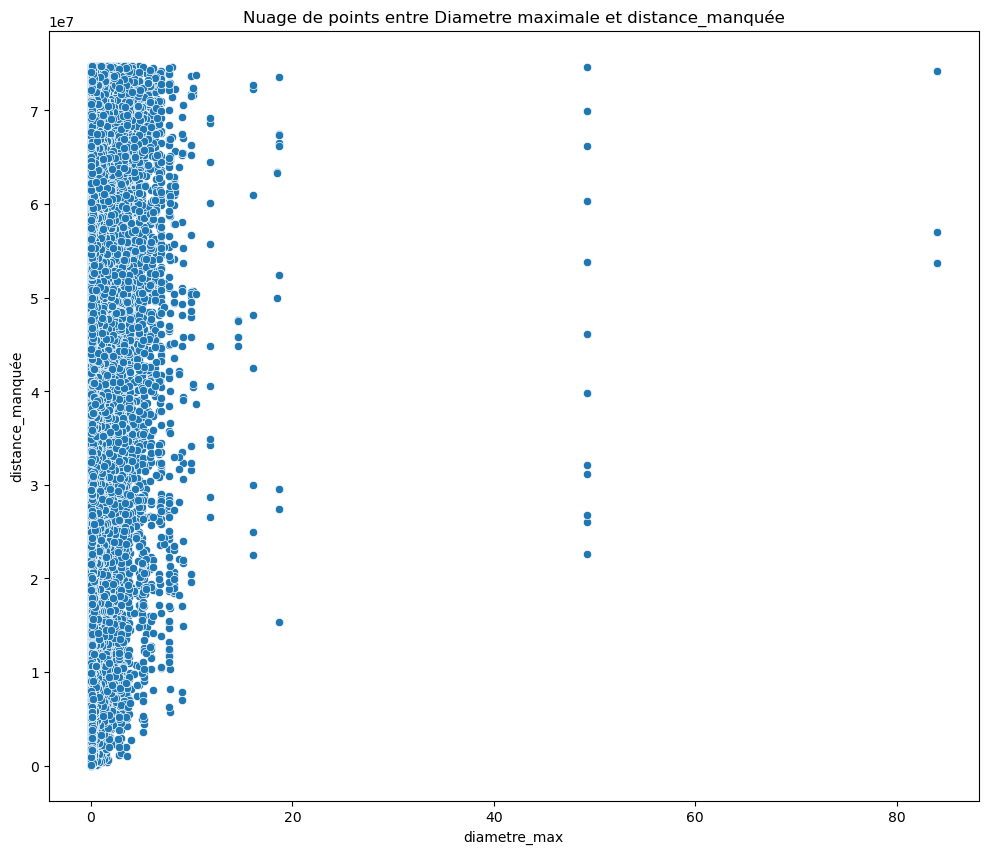

In [16]:
plt.figure(figsize = (12, 10))
sns.scatterplot(x = df['diametre_max'], y = df['distance_manquée'])
plt.title('Nuage de points entre Diametre maximale et distance_manquée')
plt.show()

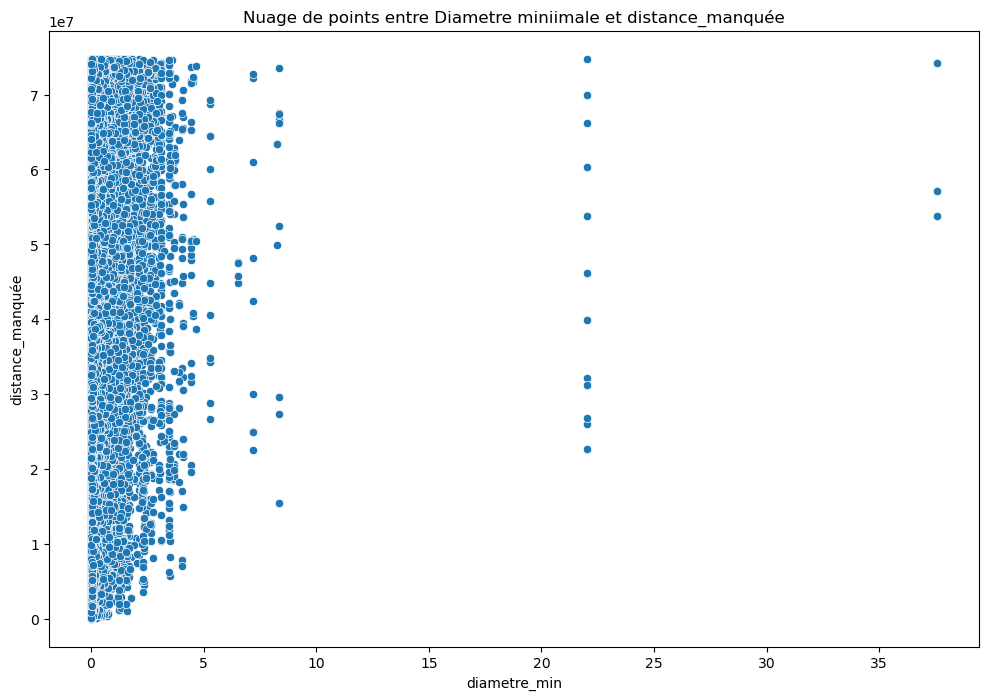

In [17]:
plt.figure(figsize = (12, 8))
sns.scatterplot(x = df['diametre_min'], y = df['distance_manquée'])
plt.title('Nuage de points entre Diametre miniimale et distance_manquée')
plt.show()

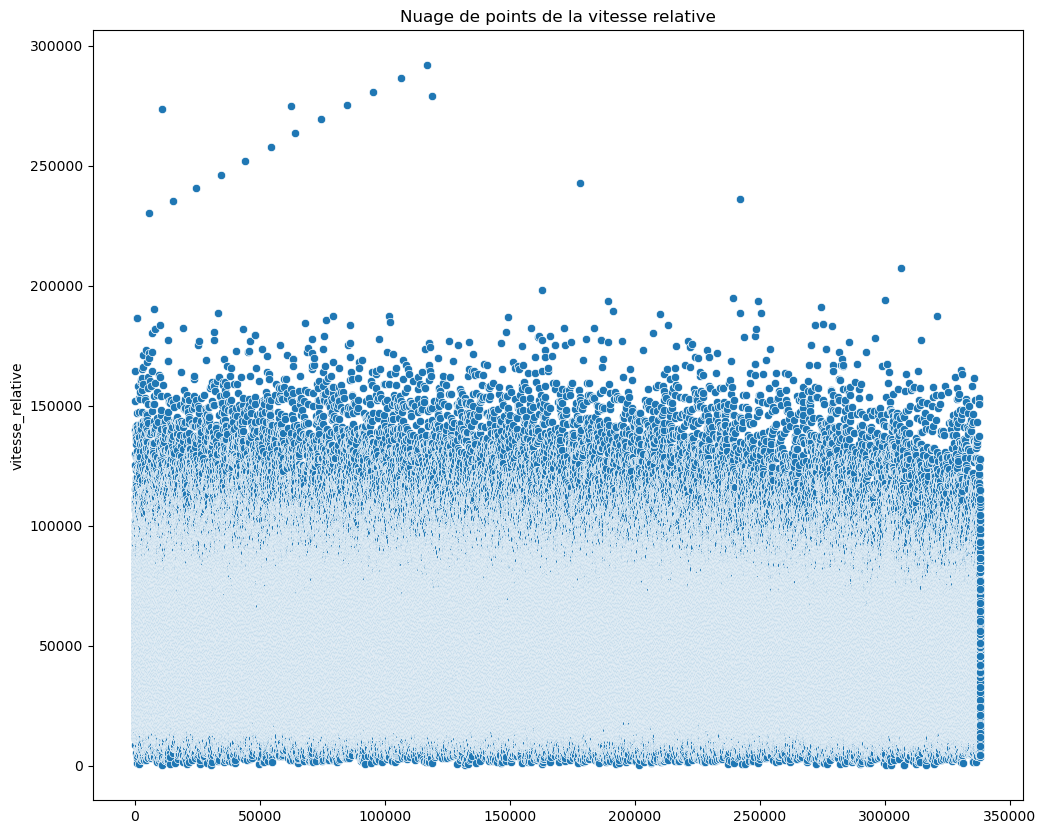

In [18]:
plt.figure(figsize = (12, 10))
sns.scatterplot(df['vitesse_relative'])
plt.title('Nuage de points de la vitesse relative')
plt.show()

In [19]:
dtale.show(df)

In [20]:
df.isnull().sum()

neo_id               0
nom_nasa             0
grandeur_absolue    28
diametre_min        28
diametre_max        28
corps_orbite         0
vitesse_relative     0
distance_manquée     0
is_hazardous         0
dtype: int64

In [21]:
df.duplicated().sum()

0

In [22]:
df.nunique()

neo_id               33514
nom_nasa             33514
grandeur_absolue      1778
diametre_min          1778
diametre_max          1778
corps_orbite             1
vitesse_relative    338189
distance_manquée    337826
is_hazardous             2
dtype: int64

In [23]:
num_cols = df.select_dtypes(exclude= 'object').columns
cat_cols = df.select_dtypes(include = 'object').columns

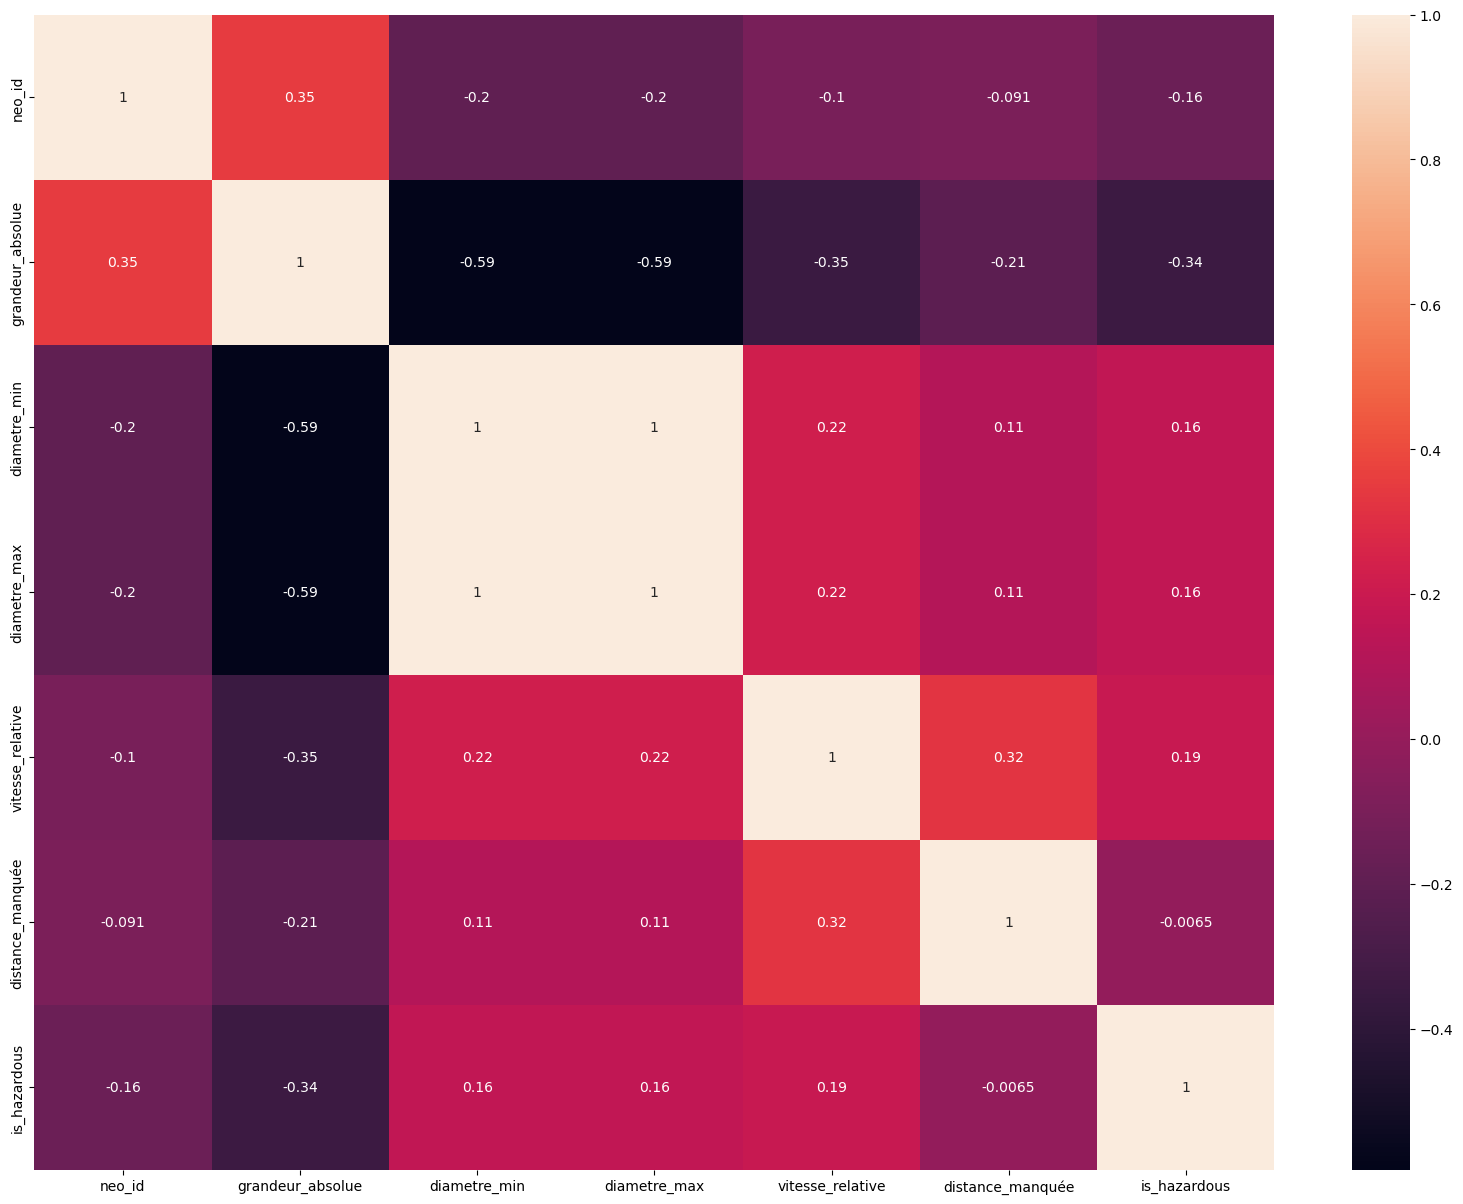

In [24]:
plt.figure(figsize=(20, 15))
sns.heatmap(df[num_cols].corr(), annot=True)
plt.show()

ahh on peut constater quelque chose à travers cette matrix. Une forte corrélation entre les diamètre min et max (corr = 1)
entre la vitesse relative et la distance manquée une corrélation de 0.32

In [25]:
## imputation des valeurs missing
## faisons une simple imputaion par la médiane
imputer = SimpleImputer(strategy='median')
for col in num_cols:
    df[col] = imputer.fit_transform(df[[col]])
df[num_cols].isnull().sum()

neo_id              0
grandeur_absolue    0
diametre_min        0
diametre_max        0
vitesse_relative    0
distance_manquée    0
is_hazardous        0
dtype: int64

In [26]:
X = df[num_cols]
X_init = X.drop('neo_id',axis = 1)

In [27]:
from sklearn.decomposition import PCA
std = StandardScaler()
pca = PCA(n_components=5)
x = X_init.values
X_std = std.fit_transform(x)
pca.fit(X_std)

PCA(n_components=5)

In [28]:
variance_expliqué = pca.explained_variance_ratio_
sum_cumulée = sum(variance_expliqué)

In [29]:
pd.DataFrame({'variance_explained': variance_expliqué, 
              'Cumulee': sum_cumulée})

,variance_explained,Cumulee
0,0.460253,1.0
1,0.198931,1.0
2,0.166322,1.0
3,0.104315,1.0
4,0.070180,1.0


In [30]:
pca.components_

array([[-0.49028342,  0.54345938,  0.54345938,  0.29066618,  0.18059449,
         0.22765053],
       [ 0.04990427,  0.31190493,  0.31190493, -0.58652901, -0.66979481,
        -0.10148313],
       [ 0.14548859,  0.19990267,  0.19990267, -0.06185653,  0.38230586,
        -0.86540564],
       [ 0.10356135,  0.00768857,  0.00768857,  0.74351891, -0.59172885,
        -0.29358716],
       [ 0.85161015,  0.25951304,  0.25951304,  0.12186176,  0.14986577,
         0.32055589]])

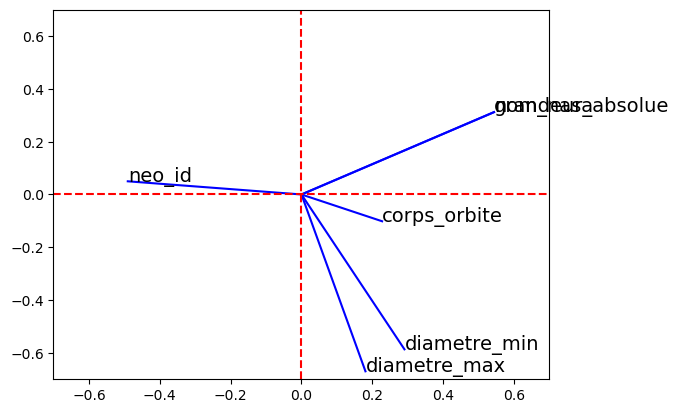

In [31]:
pcs = pca.components_

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.plot([0, x], [0, y], color = 'b')
    plt.text(x, y, df.columns[i], fontsize = '14')

#ligne horizontale x = 0
plt.plot( [-0.7, 0.7], [0, 0] , color = 'r', ls = '--')
#ligne verticale y = 0
plt.plot([0, 0], [-0.7, 0.7], color = 'r', ls = '--')
plt.xlim([-0.7, 0.7])
plt.ylim([-0.7, 0.7])
plt.show()

In [32]:
df.head()

,neo_id,nom_nasa,grandeur_absolue,diametre_min,diametre_max,corps_orbite,vitesse_relative,distance_manquée,is_hazardous
0,2162117.0,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,0.0
1,2349507.0,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,1.0
2,2455415.0,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,0.0
3,3132126.0,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,0.0
4,3557844.0,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,0.0


In [33]:
df.isnull().sum()

neo_id              0
nom_nasa            0
grandeur_absolue    0
diametre_min        0
diametre_max        0
corps_orbite        0
vitesse_relative    0
distance_manquée    0
is_hazardous        0
dtype: int64

In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, learning_curve

X = df.drop('is_hazardous', axis =1)
y = df['is_hazardous']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(236739, 8) (101460, 8) (236739,) (101460,)


In [35]:
from category_encoders import TargetEncoder
encoder = TargetEncoder(cols=cat_cols)
x_train_encoded = encoder.fit_transform(x_train[cat_cols], y_train)
x_test_encoded = encoder.transform(x_test[cat_cols])
X_train = x_train.drop(columns= cat_cols).join(x_train_encoded)
X_test = x_test.drop(columns = cat_cols).join(x_test_encoded)

In [36]:
X_train.shape

(236739, 8)

In [37]:
X_test.shape

(101460, 8)

In [38]:
X_test_std = std.fit_transform(X_test)
X_train_std = std.fit_transform(X_train)

In [39]:
# evaluation du modele
def evaluate_model(model):
    model.fit(X_train_std, y_train)
    y_pred_train = model.predict(X_train_std)
    print("*****Train result*******")
    report_train = print(f"Classification report: {classification_report(y_train, y_pred_train)}")
    matrice_train = print(f"Confusion matrix: {confusion_matrix(y_train, y_pred_train)}")
    accuracy_train = print(f"Accuracy_score: {accuracy_score(y_train, y_pred_train)}")
    precison_score_train = print(f"Precision score: {precision_score(y_train, y_pred_train)}")
    f1_score_train = print(f"F1 score: {f1_score(y_train, y_pred_train)}")
    print("+++++++++"*20)
    print("****Test Result******")
    y_pred = model.predict(X_test_std)
    report_test = print(f"Classification report: {classification_report(y_test, y_pred)}")
    matrice_test = print(f"Confusion matrix: {confusion_matrix(y_test, y_pred)}")
    accuracy_test = print(f"Accuracy_score: {accuracy_score(y_test, y_pred)}")
    precison_score_test = print(f"Precision score: {precision_score(y_test, y_pred)}")
    f1_score_test = print(f"F1 score: {f1_score(y_test, y_pred)}")


In [40]:
rf = RandomForestClassifier(n_estimators=100, max_depth= 3)
evaluate_model(rf)

*****Train result*******
Classification report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    206426
         1.0       1.00      1.00      1.00     30313

    accuracy                           1.00    236739
   macro avg       1.00      1.00      1.00    236739
weighted avg       1.00      1.00      1.00    236739

Confusion matrix: [[206426      0]
 [     0  30313]]
Accuracy_score: 1.0
Precision score: 1.0
F1 score: 1.0
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
****Test Result******
Classification report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     88611
         1.0       1.00      1.00      1.00     12849

    accuracy                           1.00    101460
   macro avg       1.00      1.00      1.00    101460
weighted avg       

La matrice de confusion obtenu nous donne  :

Vrais négatifs (True Negatives, TN) :

88611 : Le modèle a correctement prédit 88611 fois que la classe était "Non".

Faux positifs (False Positives, FP) :

0 : Le modèle n'a jamais prédit "Oui" alors que la vérité était "Non".

Faux négatifs (False Negatives, FN) :
49 : Le modèle a prédit "Non" alors que la vérité était "Oui" 49 fois.
Vrais positifs (True Positives, TP) :

12800 : Le modèle a correctement prédit 12800 fois que la classe était "Oui".
Pour interpréter cette matrice de confusion, vous pouvez calculer plusieurs métriques d'évaluation courantes pour les modèles de classification :

Interprétation :
Précision globale (Accuracy) : Indique que le modèle est très précis avec environ 99.94% de ses prédictions correctes.
Précision (Precision) : Indique que lorsqu'il prédit "Oui", il a toujours raison (100%).
Rappel (Recall) : Indique que le modèle détecte correctement environ 99.62% des cas positifs réels.
F1-Score : Une mesure combinée de la précision et du rappel, indiquant un bon équilibre entre les deux.
Conclusion :
Cette matrice de confusion montre que le modèle est très performant, avec un très haut taux de précision, rappel et F1-Score. Il y a très peu de faux négatifs (49) et aucun faux positif (0), ce qui indique que le modèle est particulièrement bon pour détecter les cas positifs tout en évitant les fausses alertes.

In [41]:
models = [
    ('tree', DecisionTreeClassifier()),
    ('catboost', CatBoostClassifier()),
    ('Adaboost', AdaBoostClassifier())
]

for name, model_name in models:
    print(name)
    evaluate_model(model_name)

tree
*****Train result*******
Classification report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    206426
         1.0       1.00      1.00      1.00     30313

    accuracy                           1.00    236739
   macro avg       1.00      1.00      1.00    236739
weighted avg       1.00      1.00      1.00    236739

Confusion matrix: [[206426      0]
 [     0  30313]]
Accuracy_score: 1.0
Precision score: 1.0
F1 score: 1.0
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
****Test Result******
Classification report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     88611
         1.0       1.00      1.00      1.00     12849

    accuracy                           1.00    101460
   macro avg       1.00      1.00      1.00    101460
weighted avg  

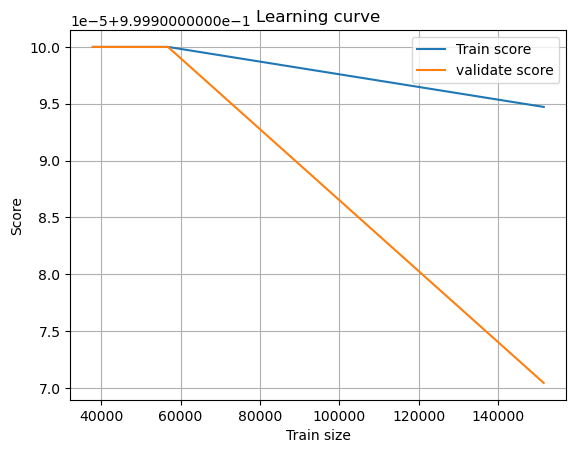

In [42]:
#learning curve
train_size, train_score, val_score = learning_curve(rf, X_train_std, y_train, train_sizes=[0.2, 0.3, 0.8])
plt.plot(train_size, train_score.mean(axis = 1), label = 'Train score')
plt.plot(train_size, val_score.mean(axis = 1), label = 'validate score')
plt.xlabel('Train size')
plt.ylabel('Score')
plt.title('Learning curve')
plt.legend()
plt.grid()
plt.show()

FEATURE ENGINERRING

In [43]:
#rayon minimale et maximale de l'objet
df['Rayon_min_objet'] = df['diametre_min'] /2
df['Rayon_max_objet'] = df['diametre_max'] /2

#aryon min, max de la terre par rapport à l'objet
df['Rayon_min_terre'] = df['distance_manquée'] - df['Rayon_min_objet']
df['Rayon_max_terre']= df['distance_manquée'] + df['Rayon_max_objet']

#diametre initial
df['diametre_initial'] = df['diametre_max'] + df['diametre_min']

In [44]:
df.head()

,neo_id,nom_nasa,grandeur_absolue,diametre_min,diametre_max,corps_orbite,vitesse_relative,distance_manquée,is_hazardous,Rayon_min_objet,Rayon_max_objet,Rayon_min_terre,Rayon_max_terre,diametre_initial
0,2162117.0,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,0.0,0.197481,0.441581,5.814362e+07,5.814362e+07,1.278123
1,2349507.0,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,1.0,0.265170,0.592939,5.580105e+07,5.580105e+07,1.716219
2,2455415.0,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,0.0,0.068159,0.152409,6.720689e+07,6.720689e+07,0.441136
3,3132126.0,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,0.0,0.099432,0.222336,3.039644e+07,3.039644e+07,0.643536
4,3557844.0,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,0.0,0.038329,0.085706,6.311863e+07,6.311863e+07,0.248069


In [45]:
df.describe()

,neo_id,grandeur_absolue,diametre_min,diametre_max,vitesse_relative,distance_manquée,is_hazardous,Rayon_min_objet,Rayon_max_objet,Rayon_min_terre,Rayon_max_terre,diametre_initial
count,3.381990e+05,338199.000000,338199.000000,338199.000000,338199.000000,3.381990e+05,338199.000000,338199.000000,338199.000000,3.381990e+05,3.381990e+05,338199.000000
mean,1.759939e+07,22.932514,0.157805,0.352863,51060.662908,4.153535e+07,0.127623,0.078903,0.176431,4.153535e+07,4.153535e+07,0.510668
std,2.287225e+07,2.911096,0.313873,0.701842,26399.238435,2.077399e+07,0.333670,0.156937,0.350921,2.077399e+07,2.077399e+07,1.015715
min,2.000433e+06,9.250000,0.000511,0.001143,203.346433,6.745533e+03,0.000000,0.000256,0.000571,6.745530e+03,6.745538e+03,0.001654
25%,3.373980e+06,20.740000,0.025384,0.056760,30712.031471,2.494540e+07,0.000000,0.012692,0.028380,2.494540e+07,2.494540e+07,0.082143
50%,3.742127e+06,22.800000,0.073207,0.163697,47560.465474,4.332674e+07,0.000000,0.036604,0.081848,4.332674e+07,4.332674e+07,0.236904
75%,5.405374e+07,25.100000,0.189041,0.422708,66673.820614,5.933961e+07,0.000000,0.094520,0.211354,5.933961e+07,5.933961e+07,0.611748
max,5.446281e+07,33.580000,37.545248,83.953727,291781.106613,7.479865e+07,1.000000,18.772624,41.976863,7.479865e+07,7.479865e+07,121.498975


In [46]:
df.shape

(338199, 14)

In [47]:
df.isnull().sum()

neo_id              0
nom_nasa            0
grandeur_absolue    0
diametre_min        0
diametre_max        0
corps_orbite        0
vitesse_relative    0
distance_manquée    0
is_hazardous        0
Rayon_min_objet     0
Rayon_max_objet     0
Rayon_min_terre     0
Rayon_max_terre     0
diametre_initial    0
dtype: int64

In [48]:
df.dtypes

neo_id              float64
nom_nasa             object
grandeur_absolue    float64
diametre_min        float64
diametre_max        float64
corps_orbite         object
vitesse_relative    float64
distance_manquée    float64
is_hazardous        float64
Rayon_min_objet     float64
Rayon_max_objet     float64
Rayon_min_terre     float64
Rayon_max_terre     float64
diametre_initial    float64
dtype: object

neo_id


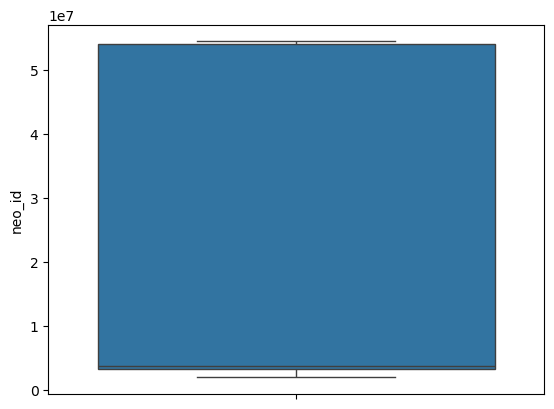

grandeur_absolue


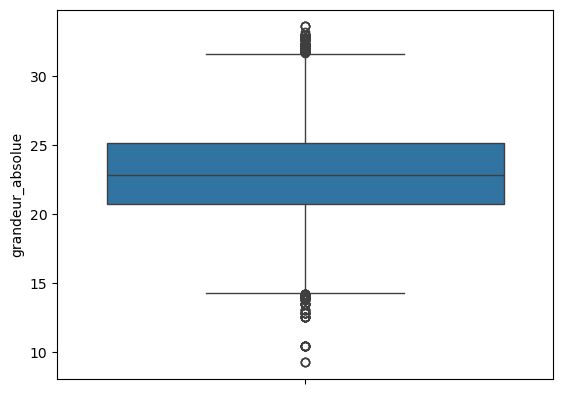

diametre_min


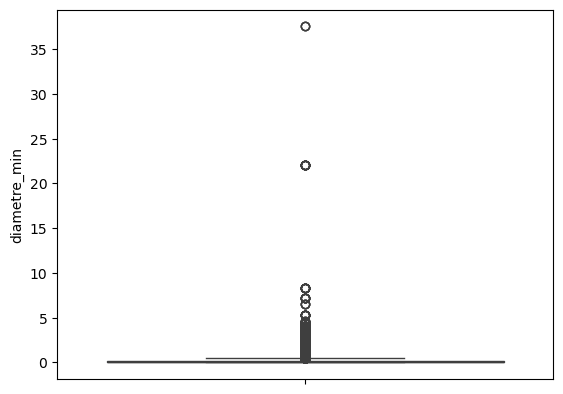

diametre_max


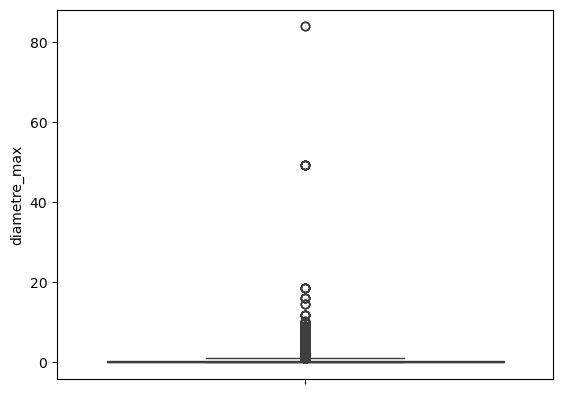

vitesse_relative


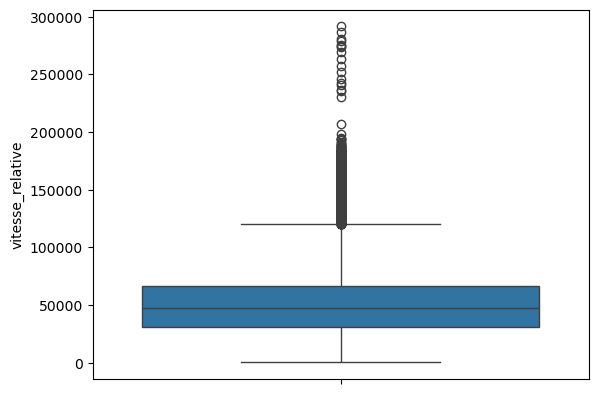

distance_manquée


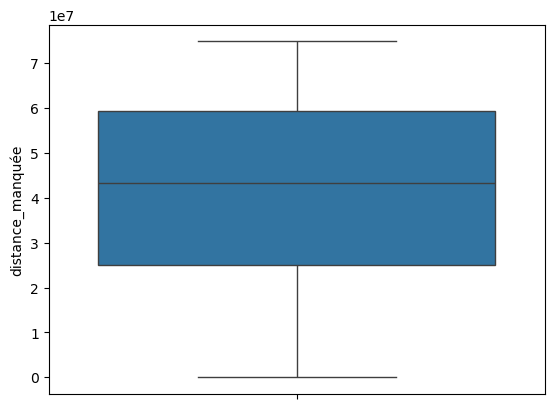

is_hazardous


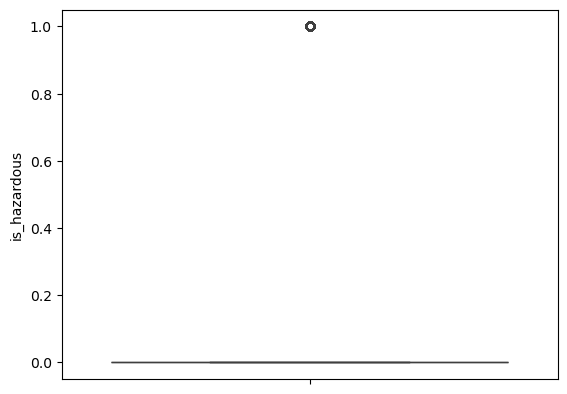

Rayon_min_objet


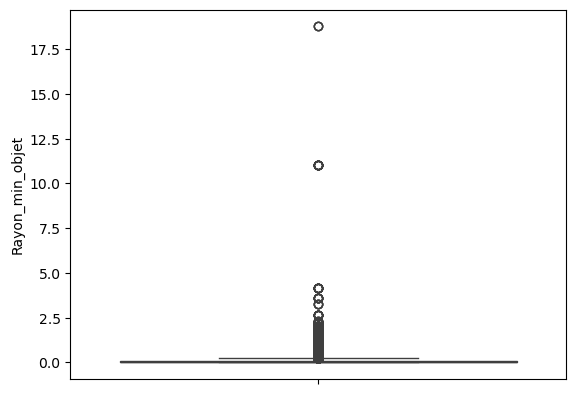

Rayon_max_objet


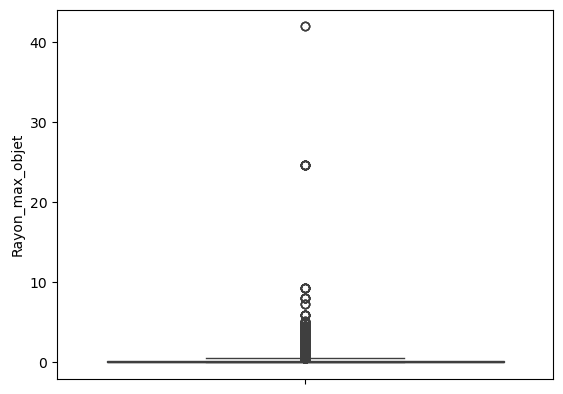

Rayon_min_terre


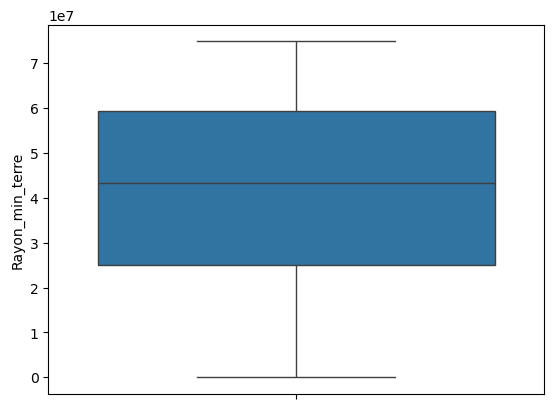

Rayon_max_terre


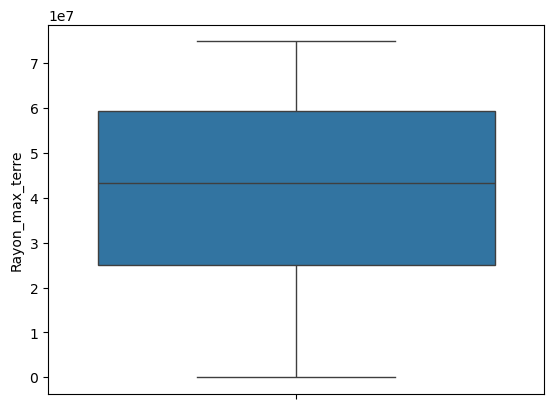

diametre_initial


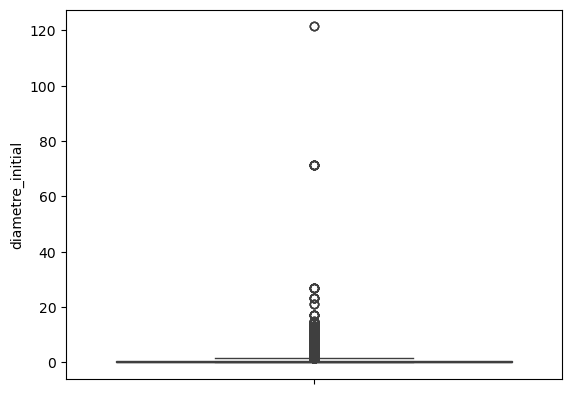

In [49]:
for col in df.select_dtypes(exclude = 'object').columns:
    print(col)
    sns.boxplot(data =df, y = col)
    plt.show()

In [50]:
#shuflle split
X = df.drop(['neo_id','is_hazardous'], axis = 1)
Y = df['is_hazardous']

In [51]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2024)

In [52]:
categorical_cols = df.select_dtypes(include = 'object').columns
encoder = TargetEncoder(cols=categorical_cols)
x_train_encoded = encoder.fit_transform(x_train[categorical_cols], y_train)
x_test_encoded = encoder.transform(x_test[categorical_cols])
X_train_transformed= x_train.drop(columns= categorical_cols).join(x_train_encoded)
X_test_transformed = x_test.drop(columns = categorical_cols).join(x_test_encoded)

#standardization
X_train_scaled = std.fit_transform(X_train_transformed)
X_test_scaled = std.fit_transform(X_test_transformed)

Evaluation du modele apres le feature ENGINEERING

In [53]:
def evaluate_model(model):
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    print("*****Train result*******")
    report_train = print(f"Classification report: {classification_report(y_train, y_pred_train)}")
    matrice_train = print(f"Confusion matrix: {confusion_matrix(y_train, y_pred_train)}")
    accuracy_train = print(f"Accuracy_score: {accuracy_score(y_train, y_pred_train)}")
    precison_score_train = print(f"Precision score: {precision_score(y_train, y_pred_train)}")
    f1_score_train = print(f"F1 score: {f1_score(y_train, y_pred_train)}")
    print("+++++++++"*20)
    print("****Test Result******")
    y_pred = model.predict(X_test_scaled)
    report_test = print(f"Classification report: {classification_report(y_test, y_pred)}")
    matrice_test = print(f"Confusion matrix: {confusion_matrix(y_test, y_pred)}")
    accuracy_test = print(f"Accuracy_score: {accuracy_score(y_test, y_pred)}")
    precison_score_test = print(f"Precision score: {precision_score(y_test, y_pred)}")
    f1_score_test = print(f"F1 score: {f1_score(y_test, y_pred)}")


In [54]:
Rf = RandomForestClassifier(n_estimators=200, max_depth=3, min_samples_leaf=1, 
                           max_features=3, criterion='gini')
evaluate_model(Rf)

*****Train result*******
Classification report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    235993
         1.0       1.00      1.00      1.00     34566

    accuracy                           1.00    270559
   macro avg       1.00      1.00      1.00    270559
weighted avg       1.00      1.00      1.00    270559

Confusion matrix: [[235993      0]
 [     0  34566]]
Accuracy_score: 1.0
Precision score: 1.0
F1 score: 1.0
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
****Test Result******
Classification report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     59044
         1.0       1.00      1.00      1.00      8596

    accuracy                           1.00     67640
   macro avg       1.00      1.00      1.00     67640
weighted avg       

In [55]:
from sklearn.neighbors import KNeighborsClassifier
models = [
    ('tree', DecisionTreeClassifier()),
    ('catboost', CatBoostClassifier()),
    ('Adaboost', AdaBoostClassifier()),
    ('KNN', KNeighborsClassifier(n_neighbors=3))
]

for name, model_name in models:
    print(f"Model: {name}")
    evaluate_model(model_name)

Model: tree
*****Train result*******
Classification report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    235993
         1.0       1.00      1.00      1.00     34566

    accuracy                           1.00    270559
   macro avg       1.00      1.00      1.00    270559
weighted avg       1.00      1.00      1.00    270559

Confusion matrix: [[235993      0]
 [     0  34566]]
Accuracy_score: 1.0
Precision score: 1.0
F1 score: 1.0
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
****Test Result******
Classification report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     59044
         1.0       1.00      1.00      1.00      8596

    accuracy                           1.00     67640
   macro avg       1.00      1.00      1.00     67640
weighte

Final MOdel

In [56]:
Rf = RandomForestClassifier(n_estimators=200, max_depth=3, max_features=3,
                            min_samples_leaf=1, criterion='gini')
Rf.fit(X_train_scaled, y_train)
pred = Rf.predict(X_test_scaled)
print(f"Model: {Rf}")
print(f"Classification Report: {classification_report(y_test, pred)}")
print(f"Accuracy score: {accuracy_score(y_test, pred)}")
print(f"F1 score : {f1_score(y_test, pred)}")
print(f"precision score : {precision_score(y_test, pred)}")
print(f"Confusion Matrix: {confusion_matrix(y_test, pred)}")


Model: RandomForestClassifier(max_depth=3, max_features=3, n_estimators=200)
Classification Report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     59044
         1.0       1.00      1.00      1.00      8596

    accuracy                           1.00     67640
   macro avg       1.00      1.00      1.00     67640
weighted avg       1.00      1.00      1.00     67640

Accuracy score: 0.9995712596096984
F1 score : 0.9983103187088505
precision score : 1.0
Confusion Matrix: [[59044     0]
 [   29  8567]]


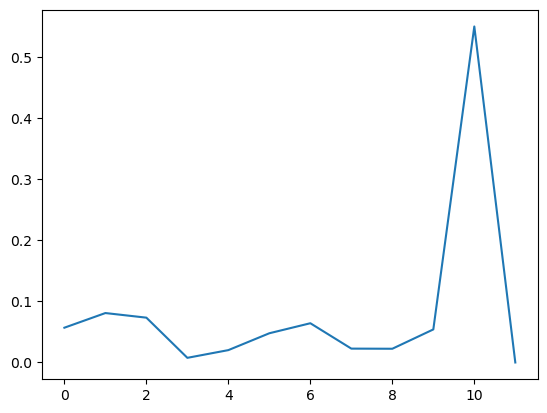

In [57]:
from sklearn.feature_selection import SelectFromModel, RFECV, SelectKBest
feature_importances = Rf.feature_importances_
plt.plot(feature_importances)

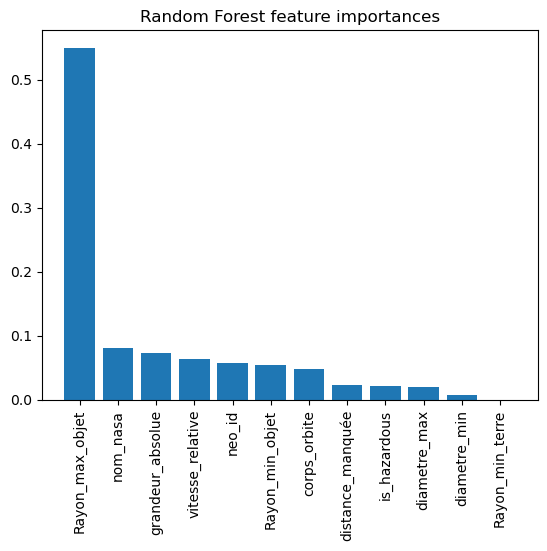

In [58]:
sorted_idx = feature_importances.argsort()[::-1]
sorted_rf_feature_importances = feature_importances[sorted_idx]

# Create a bar chart of feature importances
plt.bar(range(X_test_scaled.shape[1]), sorted_rf_feature_importances)
plt.xticks(range(X_test_scaled.shape[1]), df.columns[sorted_idx], rotation=90)
plt.title("Random Forest feature importances")
plt.show()

In [59]:
selector = SelectFromModel(Rf, prefit=True)
Rf_selected_features = np.where(selector.get_support())[0]
print("Random Forest-selected features:")
print(df.columns[Rf_selected_features])

Random Forest-selected features:
Index(['Rayon_max_objet'], dtype='object')
